<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-murasakiw/blob/main/Actividad_Semanal_6_Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

##Ejercicio 1

In [3]:
path ='https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [4]:

# X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
# X2: Gender (1 = male; 2 = female). 
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
# X4: Marital status (1 = married; 2 = single; 3 = others). 
# X5: Age (year). 
# X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
# X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
# X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.


In [5]:
df = pd.read_csv(path, index_col=False)


##Ejercicio 2

In [6]:
df.shape

(30000, 25)

In [7]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [8]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [9]:
df.drop(columns='ID', inplace=True)

In [10]:
df.dtypes

X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

In [12]:
df.isna().sum()

X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

##Ejercicio 3

In [13]:
variables_numericas = ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
variables_categoricas = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y']

In [14]:
for val in variables_numericas:
  df[val].fillna(value = np.mean(df[val]), inplace = True)

for val in variables_categoricas:
  df[val].fillna(value = st.mode(df[val]), inplace = True)

In [15]:
Y=df[['Y']]
df.drop(columns='Y', inplace = True)

In [16]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [17]:
df.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64

##Ejercicio 4

In [18]:
df[variables_numericas].describe().round(3)

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000
mean,167484.323,35.484,51236.863,49190.735,47025.350,43275.652,40324.494,38881.136,5662.946,5922.489,5225.623,4827.253,4800.297,5216.260
std,129747.662,9.217,73631.716,71170.333,69345.833,64329.411,60792.752,59551.385,16561.956,23040.720,17606.075,15665.879,15278.040,17777.367
min,10000.000,21.000,-165580.000,-69777.000,-157264.000,-170000.000,-81334.000,-339603.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,50000.000,28.000,3566.750,2986.750,2674.750,2332.000,1769.500,1258.500,1000.000,836.000,390.000,298.000,254.750,118.000
50%,140000.000,34.000,22400.000,21228.500,20108.000,19066.000,18123.000,17100.500,2100.000,2010.000,1800.000,1500.000,1500.000,1500.000
75%,240000.000,41.000,67091.000,64006.250,60164.750,54506.000,50177.000,49198.250,5007.000,5000.000,4512.000,4016.500,4043.750,4000.000
max,1000000.000,79.000,964511.000,983931.000,1664089.000,891586.000,927171.000,961664.000,873552.000,1684259.000,896040.000,621000.000,426529.000,528666.000


##Ejercicio 5

In [19]:
df['X2'].value_counts()

2.0    18113
1.0    11887
Name: X2, dtype: int64

In [20]:
df['X3'].value_counts()

2.0    14032
1.0    10585
3.0     4915
5.0      280
4.0      123
6.0       51
0.0       14
Name: X3, dtype: int64

In [21]:
df['X4'].value_counts()

2.0    15966
1.0    13657
3.0      323
0.0       54
Name: X4, dtype: int64

In [22]:
df['X6'].value_counts()

 0.0    14739
-1.0     5684
 1.0     3688
-2.0     2759
 2.0     2667
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: X6, dtype: int64

In [23]:
df['X7'].value_counts()

 0.0    15733
-1.0     6047
 2.0     3927
-2.0     3782
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: X7, dtype: int64

In [24]:
df['X8'].value_counts()

 0.0    15768
-1.0     5935
-2.0     4085
 2.0     3819
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
Name: X8, dtype: int64

In [25]:
df['X9'].value_counts()

 0.0    16459
-1.0     5685
-2.0     4348
 2.0     3157
 3.0      180
 4.0       69
 7.0       58
 5.0       35
 6.0        5
 1.0        2
 8.0        2
Name: X9, dtype: int64

In [26]:
df['X10'].value_counts()

 0.0    16953
-1.0     5535
-2.0     4546
 2.0     2624
 3.0      178
 4.0       84
 7.0       58
 5.0       17
 6.0        4
 8.0        1
Name: X10, dtype: int64

In [27]:
df['X11'].value_counts()

 0.0    16292
-1.0     5735
-2.0     4895
 2.0     2765
 3.0      184
 4.0       49
 7.0       46
 6.0       19
 5.0       13
 8.0        2
Name: X11, dtype: int64

##Ejercicio 6

In [28]:
scaler = StandardScaler() #Se estandarizan los datos utilizando utilizando StandardScaler
scaler.fit(df)
X = scaler.transform(df)

In [36]:
X_1=pd.DataFrame(X)

##Ejercicio 7

In [29]:
pca = PCA(n_components=7)
X_nueva = pca.fit_transform(X)

In [30]:
print(pca.explained_variance_ratio_)
print(f'Porcentaje total de varianza explicada: {pca.explained_variance_ratio_.sum()}')

[0.28447175 0.17816416 0.06743662 0.06400368 0.04457829 0.04161636
 0.03946313]
Porcentaje total de varianza explicada: 0.7197339816421231


In [31]:
proporciones = {'Proporción de varianza': pca.explained_variance_ratio_,
           'Proporción acumulada': np.cumsum(pca.explained_variance_ratio_)
           }
df_varianza = pd.DataFrame(proporciones).transpose()
df_varianza = df_varianza.round(2) 
df_varianza.columns = ['PC{}'.format(i) for i in range(1, len(df_varianza.columns)+1)]
df_varianza

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Proporción de varianza,0.28,0.18,0.07,0.06,0.04,0.04,0.04
Proporción acumulada,0.28,0.46,0.53,0.59,0.64,0.68,0.72


In [32]:
pca_df = pd.DataFrame(pca.components_.transpose(), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index =df.columns )
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,0.068531,0.316371,0.017394,0.069905,-0.149260,-0.375705,0.105963
X2,-0.021715,0.030552,0.023993,-0.077845,0.884134,-0.395239,0.064774
X3,0.019210,-0.091555,-0.316081,0.246897,0.364837,0.565526,-0.399436
X4,-0.005641,-0.043264,0.452806,-0.445001,-0.053244,0.279679,-0.159683
X5,0.014263,0.066592,-0.462072,0.463061,-0.164074,-0.088646,0.081253
X6,0.161070,-0.298191,-0.017356,0.016107,-0.034868,-0.039470,-0.086890
X7,0.194089,-0.334912,0.017888,0.049845,-0.036823,-0.061687,-0.091838
X8,0.200212,-0.343773,0.061571,0.084019,-0.023669,-0.069575,-0.021540
X9,0.207027,-0.344591,0.089036,0.109362,-0.007996,-0.086831,0.039271
X10,0.210878,-0.331616,0.108792,0.115556,0.001796,-0.087206,0.104034


##Ejercicio 8

In [39]:
resultados = list()
for i in range(len(variables_numericas)):
  resultados.append(X_1[i].ravel())

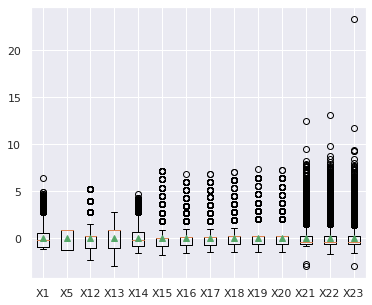

In [40]:
#Se graficaron los datos estandarizados para poder visualizarlos de mejor manera
sns.set(rc={'figure.figsize':(6,5)})
plt.boxplot(resultados, labels = variables_numericas, showmeans=True)
plt.show()

##Ejercicio 9 y 10

In [53]:
ndf = df[variables_numericas]

In [55]:
#Se modifican los nombres de las columnas para mejorar la visualización
columnas = ['Given_credit', 'Age', 'Bill_September', 'Bill_August', 'Bill_July', 
            'Bill_June', 'Bill_May', 'Bill_April', 'Payment_September', 
            'Payment_August', 'Payment_July', 'Payment_June', 'Payment_May', 
            'Payment_April']
ndf.columns = columnas

In [57]:
m_corr = ndf.corr().round(3) #Se calcula la matriz de correlación, redondeando a tres decimales

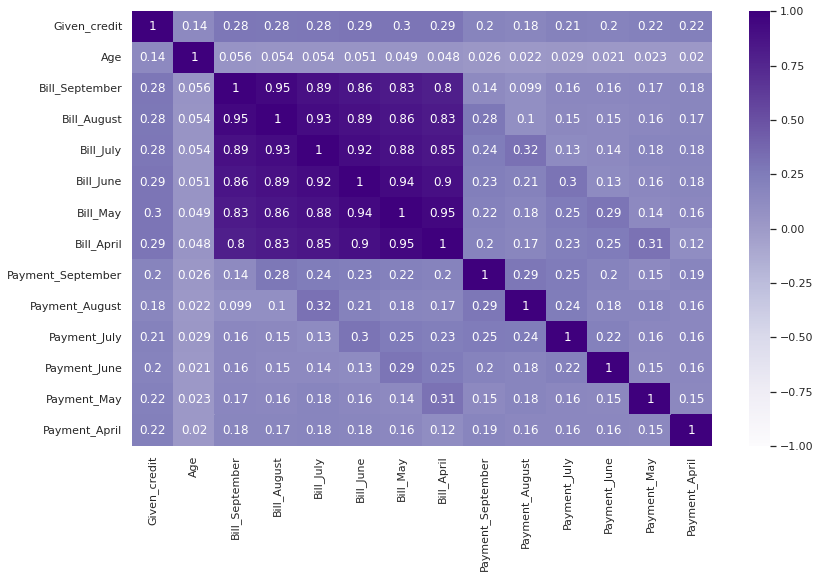

In [58]:
sns.set(rc={'figure.figsize':(13,8)}) #Se muestra la matriz de correlación utilizando un heatmap para ayudar con la visualización
sns.heatmap(m_corr, vmin = -1, vmax = 1, cmap='Purples', annot=True)
plt.show()

Con este gráfico se puede visualizar la correlación que tienen las variables, se pueden utlizar estos valores para intentar disminuir la cantidad de los datos de entrada al remover variables que están aportando información similar. Se utilizó un mapa de calor para visualizar la matriz de correlación, se puede observar que esta técnica favorece mucho a la interpretación de los datos cuando se tienen demasiadas variables.

In [71]:
#Obtención de los valores para graficar el piechart
genero = df['X2'].value_counts().values
labels = ['Male', 'Female']

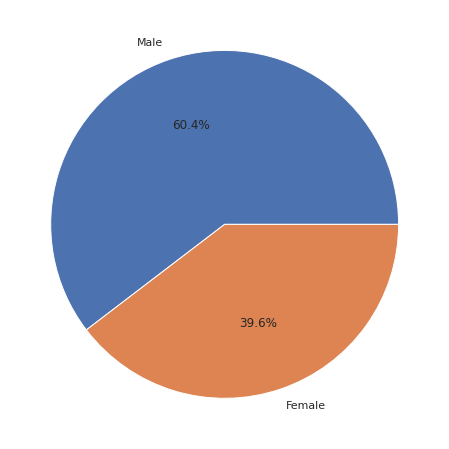

In [72]:
plt.pie(genero, labels=labels, autopct='%1.1f%%', )
plt.show()

Con este gráfico muy simple se puede obtener información muy valiosa, pues se puede visualizar con mucha facilidad las proporciones de género en los clientes. Este tipo de gráficas pueden ser útiles para tomar la decisión sobre en qué sector de los clientes se debe de enfocar una empresa con la finalidad de tener un balance de clientes masculinos y femeninos.

In [96]:
df_3 = pd.DataFrame(df.groupby('X5').X1.aggregate(np.mean))
df_3.head()

,X1
X5,
21.0,23283.582090
22.0,37928.571429
23.0,59752.953813
24.0,75661.047028
25.0,102731.871838


In [98]:
edades = df_3.index.values.round()

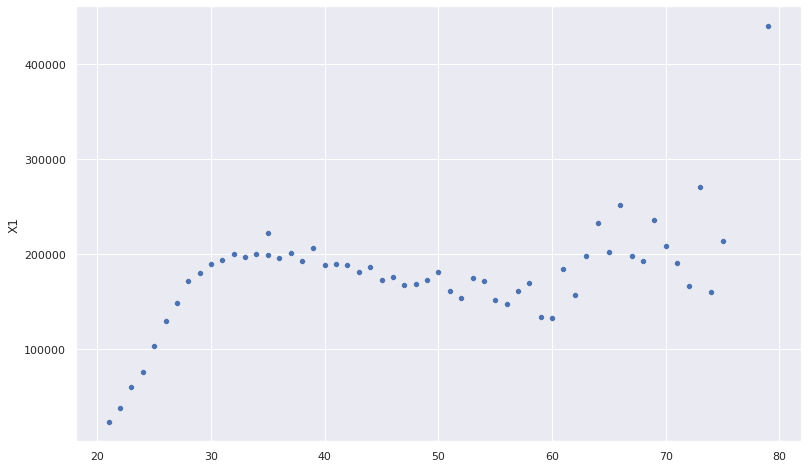

In [108]:
#Gráfico que muestra los promedios de los créditos otorgados por edad a los clientes
sns.scatterplot(x=edades, y=df_3['X1'])
plt.show()

Este gráfico muestra las medias de los créditos otorgados de los clientes agrupados por edades. Con esto se puede observar que en promedio la cantidad de crédito otorgado desde los 20 a los 30 años va creciendo y posteriormente ya no tiene tanta variación. Se puede observar que aproximadamente a partir de los 60 años ya no se tiene un comportamiento tan definido.